Mounted at /content/gdrive


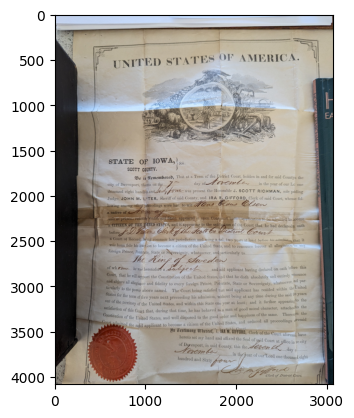

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Mount your Google Drive
drive.mount('/content/gdrive')

# Set the path to your image file on the shared drive
image_path = '/content/gdrive/MyDrive/ha-image/original_image_full.jpg'

img = mpimg.imread(image_path)

plt.imshow(img)

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
xform_bbox_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform0_carlv_bbox.txt'

In [6]:
import pickle

with open(xform_bbox_path, "rb") as f:
    preds = pickle.load(f)

print(preds)

UnpicklingError: invalid load key, '['.

In [4]:
import ast
def file_to_object(path):
    with open(path, 'r') as f:
        target_object = ast.literal_eval(f.read())
    return target_object
xform_bbox_path = '/content/gdrive/MyDrive/AIM/citizen_1864_xform0_carlv_bbox.txt'
preds = file_to_object(xform_bbox_path)
print(preds)

ValueError: malformed node or string on line 1: <ast.Call object at 0x7e4f486f35b0>

In [ ]:
import numpy as np
preds = [
    ('of', np.array([[1812.8906 ,  434.29688],
       [1972.2656 ,  434.29688],
       [1972.2656 ,  525.9375 ],
       [1812.8906 ,  525.9375 ]], dtype=np.float32)),
    ('america', np.array([[2039.0361 ,  440.46344],
       [2700.8264 ,  430.73114],
       [2702.342  ,  533.7752 ],
       [2040.5515 ,  543.5075 ]], dtype=np.float32)),
    ('states', np.array([[1221.82   ,  484.05478],
       [1766.906  ,  442.125  ],
       [1774.8046 ,  544.8047 ],
       [1229.7185 ,  586.73444]], dtype=np.float32)),
    ('united', np.array([[ 640.5678 ,  508.20175],
       [1172.9049 ,  472.71265],
       [1180.0449 ,  579.8147 ],
       [2621.7188, 4004.2969]], dtype=np.float32)),
    ('clerk', np.array([[2318.9062, 3968.4375],
       [2418.5156, 3968.4375],
       [2418.5156, 4004.2969],
       [2318.9062, 4004.2969]], dtype=np.float32)),
    ('f', np.array([[2422.5   , 3968.4375],
       [2470.3125, 3968.4375],
       [2470.3125, 4008.2812],
       [2422.5   , 4008.2812]], dtype=np.float32)),
    ('district', np.array([[2478.2812, 3968.4375],
       [2613.75  , 3968.4375],
       [2613.75  , 4004.2969],
       [2478.2812, 4004.2969]], dtype=np.float32)),
    ('court', np.array([[2621.7188, 3968.4375],
       [2725.3125, 3968.4375],
       [2725.3125, 4004.2969],
       [2621.7188, 4004.2969]], dtype=np.float32))
]

Mean Height: 58.09
Standard Deviation of Height: 23.38
Mean Width: 287.70
Standard Deviation of Width: 234.87


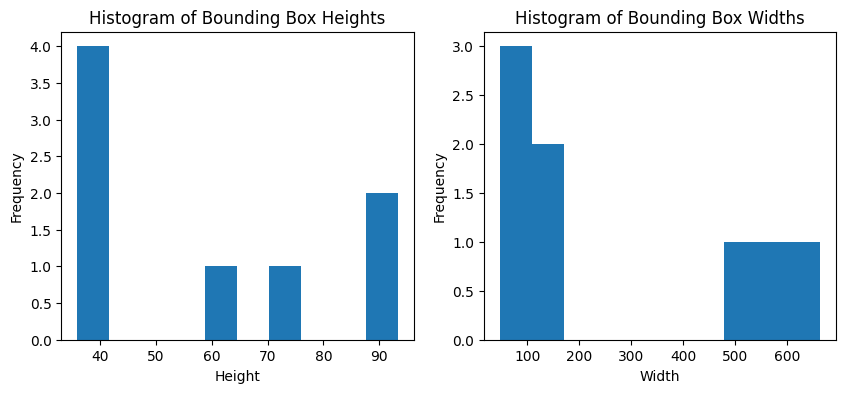

In [ ]:
# model A
# Collect heights and widths
heights = []
widths = []
for word, bbox in preds:
    top_left_y = bbox[0][1]
    top_left_x = bbox[0][0]
    bottom_right_y = bbox[2][1]
    bottom_right_x = bbox[2][0]

    heights.append(bottom_right_y - top_left_y)
    widths.append(bottom_right_x - top_left_x)

# Calculate mean, standard deviation
mean_height = np.mean(heights)
std_height = np.std(heights)
mean_width = np.mean(widths)
std_width = np.std(widths)

print(f"Mean Height: {mean_height:.2f}")
print(f"Standard Deviation of Height: {std_height:.2f}")
print(f"Mean Width: {mean_width:.2f}")
print(f"Standard Deviation of Width: {std_width:.2f}")

# Plot histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(heights)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Heights')

plt.subplot(1, 2, 2)
plt.hist(widths)
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.title('Histogram of Bounding Box Widths')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from PIL import Image

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

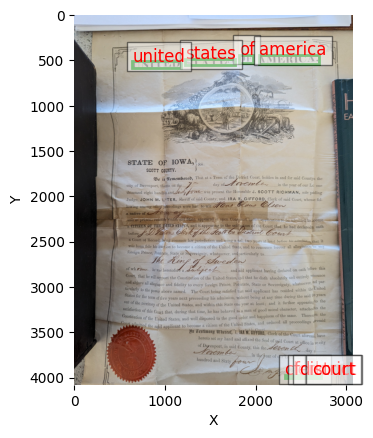

In [ ]:
# Model B w/ image download (B)
# Load the image
# image_path = 'path/to/your/image.jpg'
image = plt.imread(image_path)

# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(image)

# Add bounding boxes and text
for word, bbox in preds:
    # ... (Code to add rectangles and text - same as before)
    x, y = bbox[0]  # Top-left corner
    width = bbox[2][0] - bbox[0][0]
    height = bbox[2][1] - bbox[0][1]

    # Create a rectangle patch
    rect = mpatches.Rectangle(xy=(x, y), width=width, height=height,
                              linewidth=2, edgecolor='green', facecolor='none')
    ax.add_patch(rect)

    # Add text label
    ax.text(x, y, word, color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Adjust plot limits and labels
plt.xlabel('X')
plt.ylabel('Y')

# Optional: Use Seaborn for styling
sns.despine(left=True, bottom=True)  # Clean up axes

# Save the image
plt.savefig('image_with_overlayB.jpg', bbox_inches='tight')

# Optional: If you want to download directly as well
im = Image.open('image_with_overlayB.jpg')
im.show()  # This will display the image, often triggering a download option

from google.colab import files
files.download('image_with_overlayB.jpg')

In [ ]:
!ls -l

total 92
drwx------ 5 root root  4096 Apr 23 13:38 gdrive
-rw-r--r-- 1 root root 27545 Apr 23 14:03 image_with_overlayA.jpg
-rw-r--r-- 1 root root 27545 Apr 23 14:04 image_with_overlayB.jpg
-rw-r--r-- 1 root root 27545 Apr 23 14:03 image_with_overlays.jpg
drwxr-xr-x 1 root root  4096 Apr 19 13:30 sample_data
